In [78]:
BASE_DIR = '/Users/telmo/Dropbox/phantomgrenzen/scales-metrics'

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def read_file(region, metric, smooth):
    file_name = '%s-per-%s' % (region, metric)
    if smooth:
        file_name = '%s-smooth' % file_name
    file_path = '%s/%s.csv' % (BASE_DIR, file_name)
    data = np.genfromtxt(file_path, names=['per', 'dist', 'metric'], skip_header=1, delimiter=',')
    return data


def charts(region):
    plt.figure(figsize=(15, 10))
    
    data = read_file(region, 'count', False)
    plt.subplot(2, 3, 1)
    plt.plot(data['per'], data['metric'], 'ro-')
    plt.title('# communities')
    plt.xlabel('max. distance (percentile)')
    plt.ylabel('count')

    data = read_file(region, 'entropy', False)
    plt.subplot(2, 3, 2)
    plt.plot(data['per'], data['metric'], 'go-')
    plt.title('Entropy')
    plt.xlabel('max. distance (percentile)')
    plt.ylabel('entropy')

    data = read_file(region, 'herfindahl', False)
    plt.subplot(2, 3, 3)
    plt.plot(data['per'], data['metric'], 'bo-')
    plt.title('Herfindahl')
    plt.xlabel('max. distance (percentile)')
    plt.ylabel('Herfindahl')

    data = read_file(region, 'count', True)
    plt.subplot(2, 3, 4)
    plt.plot(data['per'], data['metric'], 'ro-')
    plt.title('# communities (smooth)')
    plt.xlabel('max. distance (percentile)')
    plt.ylabel('count')

    data = read_file(region, 'entropy', True)
    plt.subplot(2, 3, 5)
    plt.plot(data['per'], data['metric'], 'go-')
    plt.title('Entropy (smooth)')
    plt.xlabel('max. distance (percentile)')
    plt.ylabel('entropy')

    data = read_file(region, 'herfindahl', True)
    plt.subplot(2, 3, 6)
    plt.plot(data['per'], data['metric'], 'bo-')
    plt.title('Herfindahl (smooth)')
    plt.xlabel('max. distance (percentile)')
    plt.ylabel('Herfindahl')
    
    plt.show()


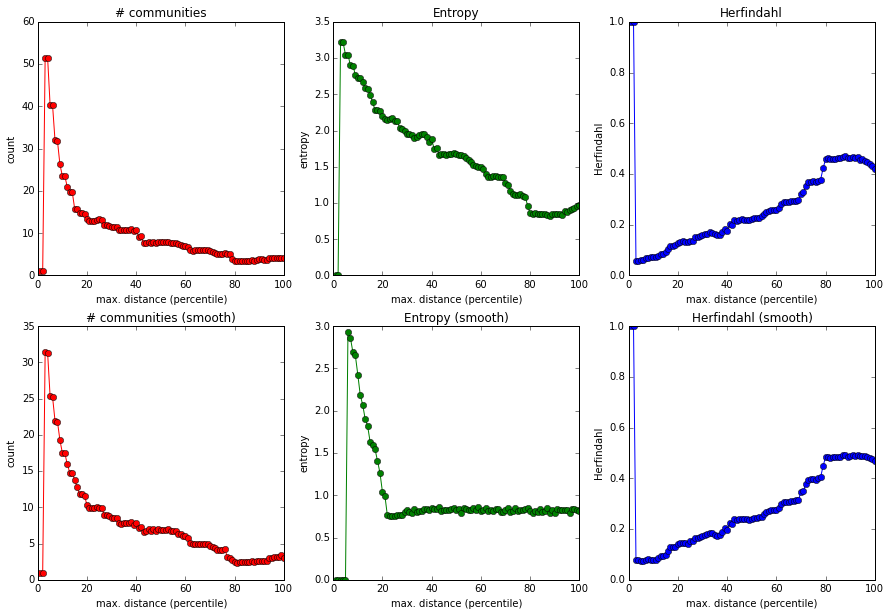

In [80]:
charts('paris')

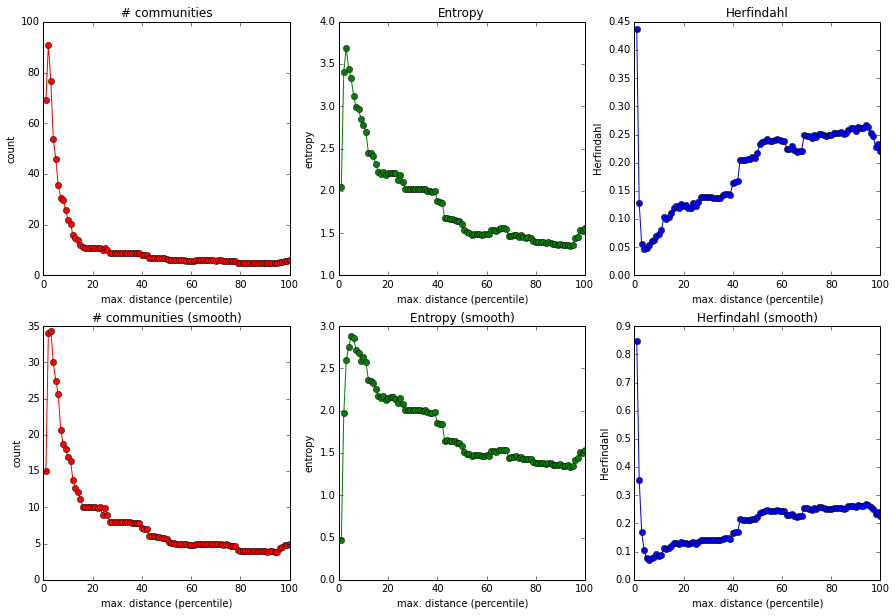

In [87]:
charts('belgium')

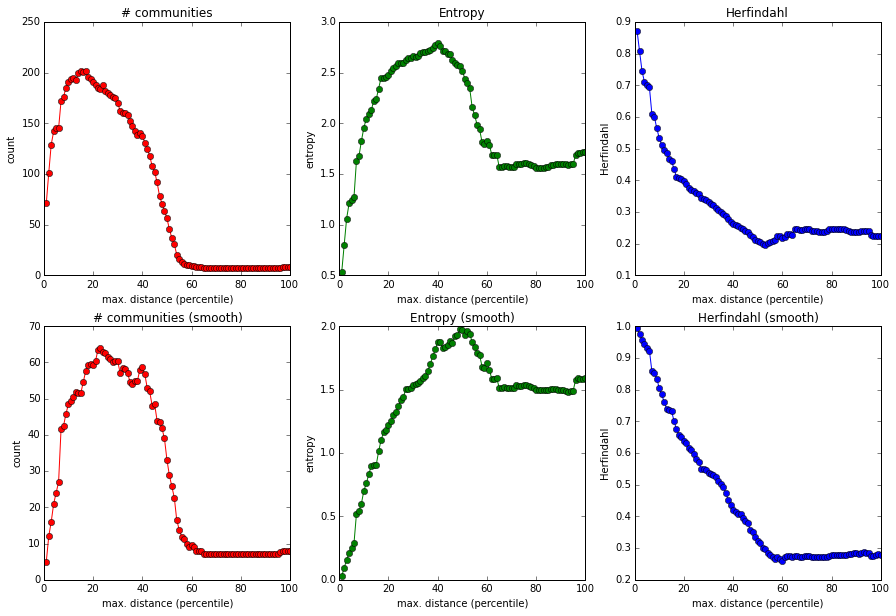

In [82]:
charts('ukraine')

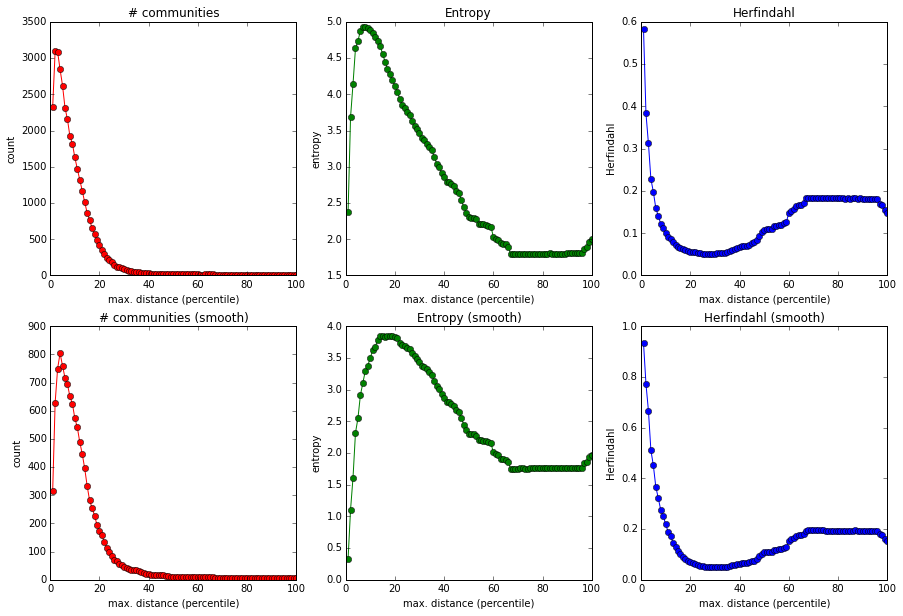

In [84]:
charts('poland')